<div style="text-align:center">
    <h1>
        VSL RL : SUMO Simulation (DQL)
    </h1>
</div>

In [1]:
#test packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import sumo_env as env
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory
import gym
#from gym.wrappers import Monitor

import datetime
from rl.callbacks import FileLogger, ModelIntervalCheckpoint
import traceback
import matplotlib.pyplot as plt 
import numpy as np

from stable_baselines3.common.results_plotter import ts2xy, load_results
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_util import make_atari_env

# Load the TensorBoard notebook extension
#from tensorflow.keras.callbacks import TensorBoard
from tensorflow.python.keras.callbacks import TensorBoard
%load_ext tensorboard

c:\Users\rhanizar\anaconda3\envs\my_rl\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [5]:

log_dir = "logs"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

#tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)

Initialize the environment

In [3]:
import gym
from gym.envs.registration import register
from SUMOInitializeEnv import SUMOEnv_Initializer
register(
    id='SumoGUI-v0',
    entry_point='SUMOInitializeEnv:SUMOEnv_Initializer'
)
env = gym.make('SumoGUI-v0')
#env = stable_baselines3.common.monitor.Monitor(env, log_dir )
np.random.seed(0)
env.seed(0)

[0]

In [5]:
import os
results_path = 'results/'
log_path = 'logs/'
if not os.path.exists(results_path):
    os.makedirs(results_path)
weights_filename = results_path + 'dqn_{}_weights.h5f'.format("SumoGUI-v0")
checkpoint_weights_filename = results_path + 'dqn_SumoGUI-v0_weights_{step}.h5f'
log_filename = log_path + 'dqn_log.csv'
callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000)]
file_logger = FileLogger(log_filename)
callbacks += [file_logger]
#callbacks += [tensorboard_callback]
#callbacks += [EvalCallback(env,log_path = log_dir, deterministic=True)]
#writer = tf.summary.create_file_writer(logdir=log_dir)

Build model

In [6]:
model = Sequential()
print (env.action_space.n)
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(400, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))
model.add(Flatten())
model.compile(loss='mse', optimizer=tf.keras.optimizers.legacy.Adam(), metrics=['accuracy'])
print(model.summary())


6
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 400)               1200      
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dense_2 (Dense)             (None, 6)                 2406      
                                                                 
 flatten_1 (Flatten)         (None, 6)                 0         
                                                                 
Total params: 164,006
Trainable params: 164,006
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
logger =TensorBoard(
    log_dir="logs",
    histogram_freq=0,
    write_graph=True,
    write_images=False,
    update_freq="step",
    profile_batch=0,
    embeddings_freq=0,
    embeddings_metadata=None
)

#### Deep Q Learning

In [8]:
import epsilon_greedy as EpsilonGreedy
#tf.debugging.experimental.enable_dump_debug_info("/users/asmae/Desktop/PHD/TS_LOGDIR", tensor_debug_mode="FULL_HEALTH", circular_buffer_size=-1)
policy = EpsGreedyQPolicy()
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=env.action_space.n, memory=memory, nb_steps_warmup=50,
    target_model_update=1e-2, policy=policy, batch_size=25, train_interval=1,gamma=0.99)
dqn.compile(tf.keras.optimizers.legacy.Adam(learning_rate=1e-4), metrics=['mse'])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [10]:
try:
    #tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    scores = dqn.fit(env, nb_steps=80000, visualize=True, log_interval=1e4, verbose=2, nb_max_episode_steps=1000)
    print(scores.history)
    #train_rewards = scores.history['episode_reward']
    #print(f"episode_reward training = {train_rewards}")
    dqn.save_weights(weights_filename, overwrite=True)
except ValueError:
    print(traceback.format_exc())
    env.close()

Training for 80000 steps ...


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\rhanizar\anaconda3\envs\my_rl\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\rhanizar\AppData\Local\Temp\ipykernel_48604\129258161.py", line 3, in <module>
    scores = dqn.fit(env, nb_steps=80000, visualize=True, log_interval=1e4, verbose=2, nb_max_episode_steps=1000)
  File "c:\Users\rhanizar\anaconda3\envs\my_rl\lib\site-packages\rl\core.py", line 131, in fit
    observation = deepcopy(env.reset())
  File "c:\Users\rhanizar\anaconda3\envs\my_rl\lib\site-packages\gym\wrappers\order_enforcing.py", line 42, in reset
    return self.env.reset(**kwargs)
  File "c:\Users\rhanizar\anaconda3\envs\my_rl\lib\site-packages\gym\wrappers\env_checker.py", line 47, in reset
    return self.env.reset(**kwargs)
  File "c:\PHD\RL_VSL_2023\rl_vsl_sumo\gym_sumo\envs\sumo_env.py", line 220, in reset
    self.start_new_simulation()
  File "c:\PHD\RL_VSL_2

TypeError: object of type 'NoneType' has no len()

In [16]:
dqn.save_weights(weights_filename, overwrite=True)

In [ ]:
env.close()

In [10]:
plt.figure(figsize=(20, 5))
plt.plot(range(len(scores.history['episode_reward'])), scores.history['episode_reward'],label='episode reward')
plt.legend()
plt.show()

NameError: name 'scores' is not defined

<Figure size 2000x500 with 0 Axes>

In [11]:
scores.history.keys()

NameError: name 'scores' is not defined

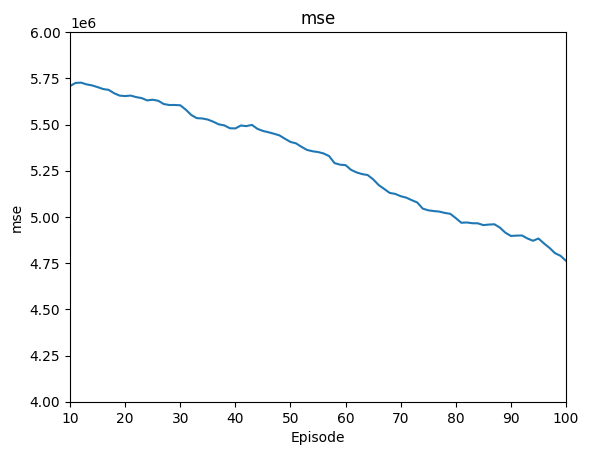

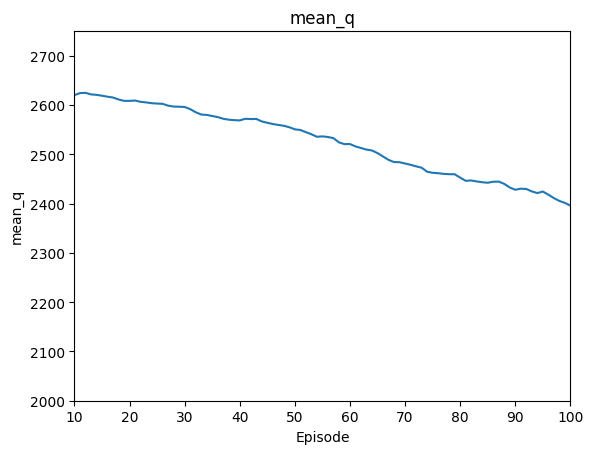

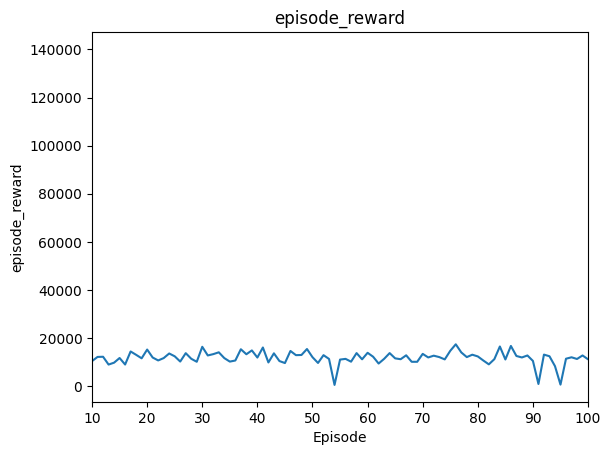

In [12]:
import json
f = open('logs/dqn_log.csv')
data = json.load(f)
#plot mse evolution
x2= data['episode']
y2 = data['mse']
plt.plot(x2, y2, label = "mse")
plt.xlim(10, 100)
plt.ylim(4000000, 6000000)
plt.xlabel('Episode')
plt.ylabel('mse')
plt.title('mse')
plt.show()
#plot mean_q 
y3 = data['mean_q']
plt.plot(x2, y3, label = "mean_q")
plt.xlim(10, 100)
plt.ylim(2000, 2750)
plt.xlabel('Episode')
plt.ylabel('mean_q')
plt.title('mean_q')
plt.show()
#plot episode_reward
y4 = data['episode_reward']
plt.plot(x2, y4, label = "episode_reward")
plt.xlim(10, 100)
#plt.ylim(2000, 2750)
plt.xlabel('Episode')
plt.ylabel('episode_reward')
plt.title('episode_reward')
plt.show()
# Closing file
f.close()
  

In [9]:
#load model from 
try:
    model = dqn.load_weights("results/dqn_SumoGUI-v0_weights.h5f")
except ValueError:
    print(traceback.format_exc())
    env.close()

In [66]:
log_path = 'logs_test/'
if not os.path.exists(log_path):
    os.makedirs(log_path)
log_filename = log_path + 'dqn_log.csv'
file_logger = FileLogger(log_filename)
callbacks1 = [file_logger]

In [10]:
try:
    scores = dqn.test(env, nb_episodes=1000, nb_max_episode_steps= 500, visualize=True)
    print(scores.history)
    print(scores.history.keys())
    env.close()
except ValueError:
    print(traceback.format_exc())
    env.close()

Testing for 1000 episodes ...


c:\Users\rhanizar\anaconda3\envs\my_rl\lib\site-packages\gym\utils\passive_env_checker.py:175: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  "Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator."
c:\Users\rhanizar\anaconda3\envs\my_rl\lib\site-packages\gym\utils\passive_env_checker.py:188: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  "Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information."
c:\Users\rhanizar\anaconda3\envs\my_rl\lib\site-packages\gym\utils\passive_env_checker.py:196: UserWarning: WARN: The result returned by `env.reset()`

Episode 1: reward: 1324.499, steps: 500
 Retrying in 1 seconds
Could not connect to TraCI server at localhost:57780 [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée
 Retrying in 1 seconds
Could not connect to TraCI server at localhost:57780 [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée
 Retrying in 1 seconds
Episode 2: reward: 1248.273, steps: 500
Episode 3: reward: 1520.096, steps: 500
Episode 4: reward: 1372.764, steps: 500
 Retrying in 1 seconds
Episode 5: reward: 1487.165, steps: 500
Episode 6: reward: 1389.485, steps: 500
Episode 7: reward: 1405.145, steps: 500
Episode 8: reward: 1474.375, steps: 500
Episode 9: reward: 1401.918, steps: 500
Episode 10: reward: 1328.039, steps: 500
 Retrying in 1 seconds
Episode 11: reward: 1409.784, steps: 500
Episode 12: reward: 1417.003, steps: 500
Episode 13: reward: 1493.157, steps: 500
Episode 14: reward: 1512.817, steps: 500
Episode 15

FatalTraCIError: Connection closed by SUMO.

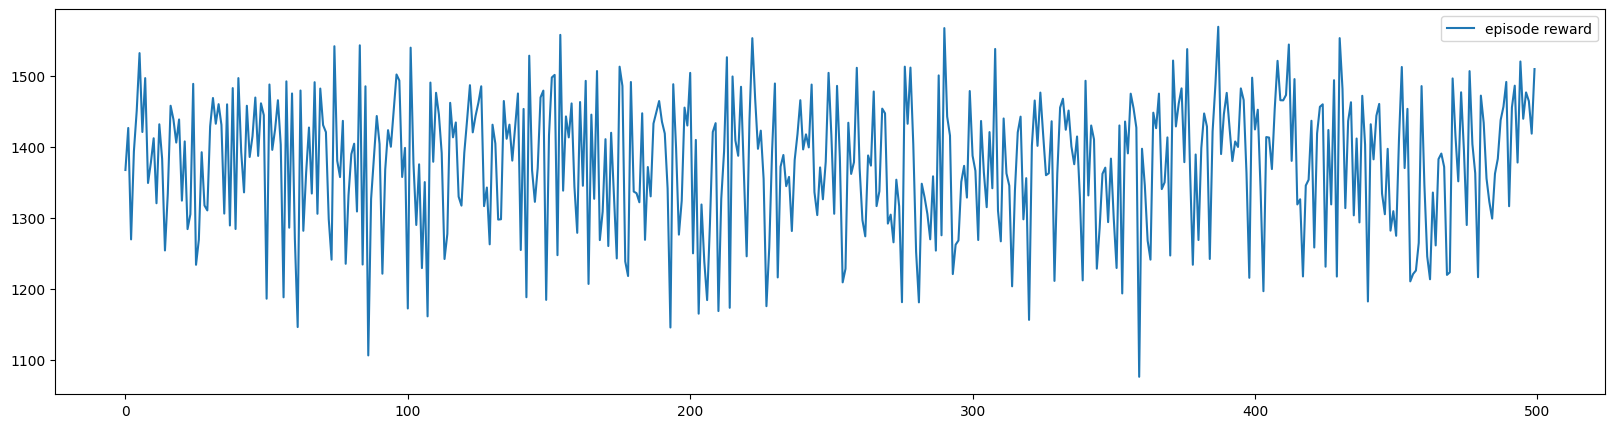

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(range(len(scores.history['episode_reward'])), scores.history['episode_reward'],label='episode reward')
plt.legend()
plt.show()

In [ ]:
%tensorboard --logdir={log_dir}

Launching TensorBoard...

('1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '

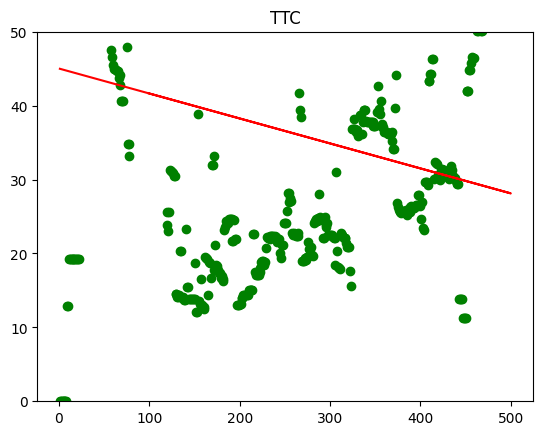

In [15]:
import json
f = open('ttc_log.txt')
my_dictionary = json.load(f)
 
myList = my_dictionary.items()
myList = sorted(myList) 
x, y = zip(*myList) 
print(x)
x= tuple(map(int, x))
print (x)
plt.plot(x, y, 'o', color='green')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
y = tuple(m * elem + b for elem in x)
plt.ylim([0,50])
#use red as color for regression line
plt.plot(x, y, color='red')
plt.title('TTC')
plt.show()

# Closing file
f.close()